

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Exam version B
 
( 7th of November, 2019 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Please read the exercices carefully, write the necesary code and respond to all the questions. The code needs to be properly commented.


In [1]:
#import cell
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from skimage import exposure,img_as_float
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.color import rgb2gray
from skimage.filters import median
import scipy as sci
from scipy import ndimage
import matplotlib.animation as animation

# Exercise 1 (3 points)

**(a) (1 point)** - Create a 100x100 image where the following chessboard-like pattern is displayed:

<img src="images/chessboard_small.png" width="100">

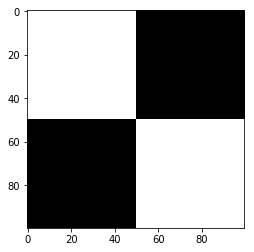

In [2]:
im = np.ones((100,100))#image 100x100
im[50:,50:] = 255 #white quarter(bottom right)
im[50:,:50] = 0 #black quarter(bottom left)
im[:50,50:] = 0 #black quarter(top rigth)
im[:50,:50] = 255 #white quarter(top left)
plt.imshow(im,cmap="gray")
plt.show()

**(b) (1 point)** - Repeat the previously created image so as to obtain a image four times greater (200x200). The resulting image should be equal to the following one:

<img src="images/chessboard_bigger.png" width="100">

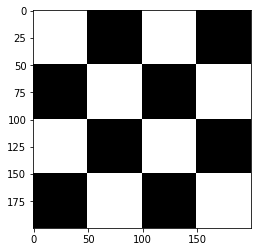

In [3]:
im2 = np.ones((200,200))#image 200x200
#copy im to all quarters
im2[100:,100:] = im #quarter(bottom right)
im2[100:,:100] = im #quarter(bottom left)
im2[:100,100:] = im #quarter(top right)
im2[:100,:100] = im #quarter(top left)
plt.imshow(im2,cmap="gray")
plt.show()

**(c) (1 point)** - Obtain a new image where the color of the white squares is modified as follows:

<img src="images/chessboard_bigger_color.png" width="100">

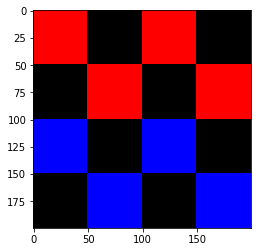

In [4]:
im3 = np.ones((200,200,3),dtype='uint8')#image 200x200xrgb

tmp = np.ones((100,100,3),dtype='uint8')#image 100x100
tmp[50:,50:] = [255,0,0] #red/blue quarter(bottom right)
tmp[50:,:50] = [0,0,0] #black quarter(bottom left)
tmp[:50,50:] = [0,0,0] #black quarter(top rigth)
tmp[:50,:50] = [255,0,0] #red/blue quarter(top left)
#red top parts
im3[:100,100:] = tmp #quarter(top right)
im3[:100,:100] = tmp #quarter(top left)
#mod to blue
tmp[50:,50:] = [0,0,255] #red/blue quarter(bottom right)
tmp[:50,:50] = [0,0,255] #red/blue quarter(top left)
#blue bottom parts
im3[100:,100:] = tmp #quarter(bottom right)
im3[100:,:100] = tmp #quarter(bottom left)

#plot
plt.imshow(im3)
plt.show()


# Exercise 2 (4 points)

**(a) (2 points)** Load the image `NoisyPears.png` and display the original image. Then show each of the channels and grey image separately (use appropriate cmap) in a 2x2 image plot. Compute the histogram (grouped bar chart with labels) for each of the channels (R, G, B) and also for the grey image, using 32 bins. Remember to include the title for each plotted image/subimage and the axis labels when necessary.

<img src="images/NoisyPears.png" width="200">

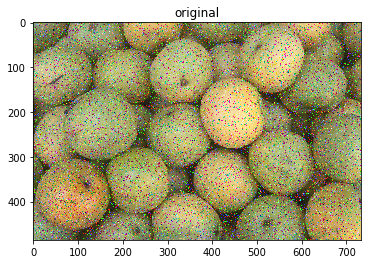

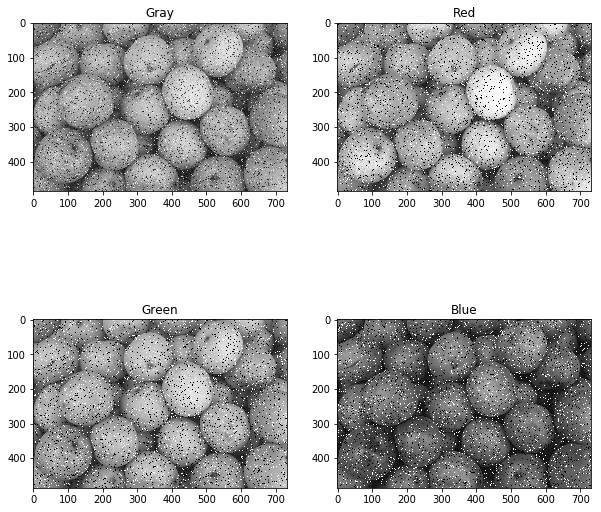

In [5]:
image = io.imread("images/NoisyPears.png")#load img
image = img_as_float(image)
#original
plt.title("original")
plt.imshow(image)
plt.show()
#extract channels
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
gray = rgb2gray(image)

figure, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))#create subplots
#setting titles
ax[0][0].title.set_text("Gray")
ax[0][1].title.set_text("Red")
ax[1][0].title.set_text("Green")
ax[1][1].title.set_text("Blue")
#plot
ax[0][0].imshow(gray,cmap="gray")
ax[0][1].imshow(red,cmap="gray")
ax[1][0].imshow(green,cmap="gray")
ax[1][1].imshow(blue,cmap="gray")
plt.show()


In [6]:
#auxiliar function for plot histogram by channel
def plot_histo_bychannel(histogram1,histogram2,histogram3,histogram4):
    data1 = histogram1[0].astype(int)
    data2 = histogram2[0].astype(int)
    data3 = histogram3[0].astype(int)
    data4 = histogram4[0].astype(int)
    ind = np.arange(len(data1))
    
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,10))
    rects1 = ax.bar(ind, data1, width,
                    label='Red',color='r')
    rects2 = ax.bar(ind + 1.5*width, data2, width,
                    label='Green',color='g')
    rects3 = ax.bar(ind + 2*width, data3, width,
                    label='Blue',color='b')
    rects4 = ax.bar(ind + 2.5*width, data4, width,
                    label='Gray',color=(0, 0, 0, 1))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Num. of Ocurrence')
    ax.set_title('Histogram by Color Channel')
    ax.set_xticks(ind)
    ax.set_xticklabels(histogram1[1].astype(int))
    ax.legend()


    def autolabel(rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}

        for rect in rects:
            height = rect.get_height()
            ax.annotate("",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')


    autolabel(rects1, "left")
    autolabel(rects2, "center")
    autolabel(rects3, "right")
    autolabel(rects4, "right")
    plt.tight_layout()

    plt.show()

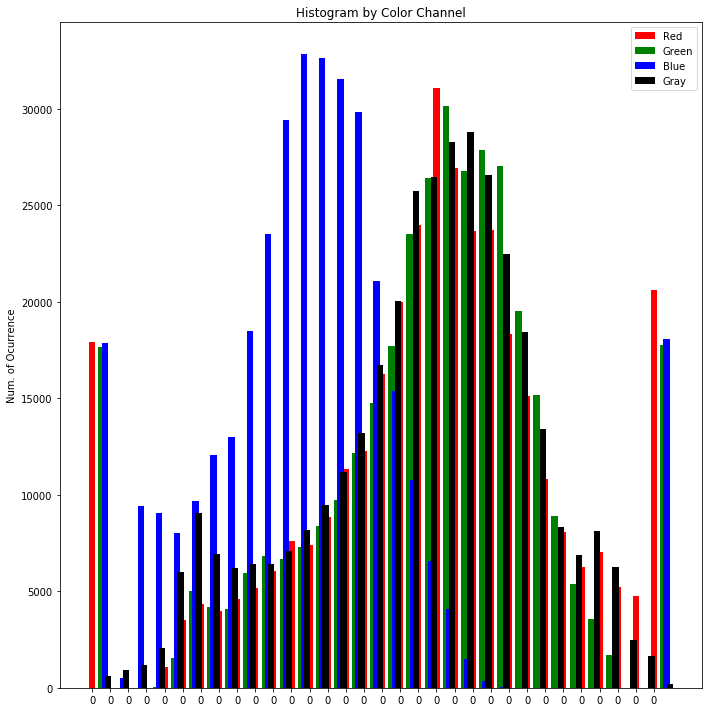

In [7]:
#create histogram of every channel using differents bins
red_32 = np.asarray(exposure.histogram(red,32))
green_32 = np.asarray(exposure.histogram(green,32))
blue_32 = np.asarray(exposure.histogram(blue,32))
gray_32 = np.asarray(exposure.histogram(gray,32))
#ploting histogram
plot_histo_bychannel(red_32,green_32,blue_32,gray_32)#Plot

**(b) (2 points)** Apply a 2D convolution and a median filter (kernel size of 11x11 pixels with equally distributed weights in both cases) to the grey image. Show the original, convolved and median filtered grey images using a 1x3 plot. Describe which of them is better to reduce the "salt and pepper" noise.

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


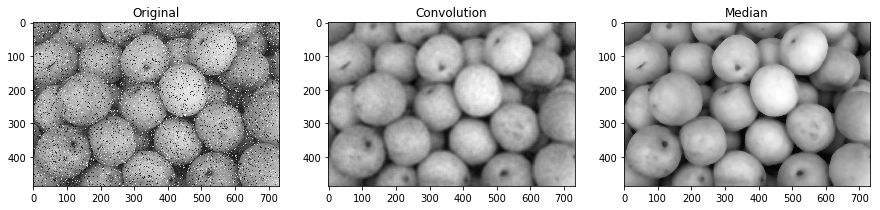

In [8]:
mask = np.ones((11,11))#mask
mask /= np.sum(mask)#normalize mask

conv_im = sci.ndimage.convolve(gray,mask)#convolved image
median_im = median(gray,mask)#median image

figure, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15),squeeze=False)#create subplots
#setting titles
ax[0][0].title.set_text("Original")
ax[0][1].title.set_text("Convolution")
ax[0][2].title.set_text("Median")

#plot
ax[0][0].imshow(gray,cmap="gray")
ax[0][1].imshow(conv_im,cmap="gray")
ax[0][2].imshow(median_im,cmap="gray")
plt.show()
#median filter does a better job overall the image is so clear and removes all the noise

# Exercise 3 (3 points)
**(a) (3 points)** Load the video in the folder `images/Barcelona-sequenceB`which contains two scenes. Determine the first and last frame for each video by visually comparing some measurements related to histograms of consecutive frames. 

<img src="images/Barcelona-sequenceB/Barcelona-frame00104.png" width="200">

<IPython.core.display.Javascript object>


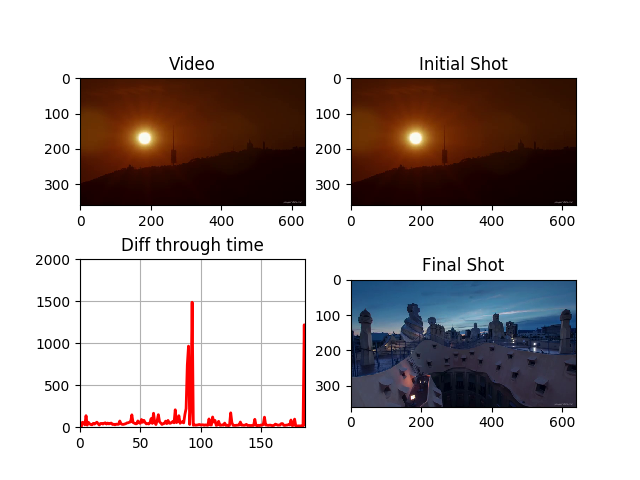

In [11]:
#We'll use the avg diff between rgb histogram of consecutive frames inorder to detect a change in the scene.
#We must check if that diff surpass(or not) a certain threshold.

ic = io.ImageCollection('images/Barcelona-sequenceB/*.png')# Reading a sequence of images from a folder

%matplotlib nbagg 

def create_rgb_histo(frame):#we create the histogram of an image for every color channel
    frame = img_as_float(frame)
    
    frame_r = frame[:,:,0]
    frame_g = frame[:,:,1]
    frame_b = frame[:,:,2]
    
    histogram_r = np.array(exposure.histogram(frame_r,256))[0]
    histogram_g = np.array(exposure.histogram(frame_g,256))[0]
    histogram_b = np.array(exposure.histogram(frame_b,256))[0]
    return [histogram_r,histogram_g,histogram_b]
    

def diff_avg(a,b):#calculate de avg difference between 2(rgb)histograms of different images
    diff = []
    for i in range(3):
        diff.append(np.abs(a[i]-b[i]))
    
    return np.mean(diff)

        
    
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < len(ic):
        i1 = create_rgb_histo(img_as_float(ic[t]))#current histo
        i2 = i1
        if(t != 0):
            i2 = create_rgb_histo(img_as_float(ic[t-1]))#last pic histo
        cnt+=1
        t += 1
        # adapted the data generator to yield both sin and cos
        yield t, diff_avg(i1,i2)#current frame,diff_avg

data_gen.t = 0

%matplotlib nbagg

# create a figure with 4 subplots
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Video')
ax2.title.set_text('Initial Shot')
ax3.title.set_text('Diff through time')
ax4.title.set_text('Final Shot')
plt.show()

# intialize a line object on the second axes for plotting
line, = ax3.plot([], [], lw=2, color='r')

ax3.set_ylim(0, 2000)#max diff
ax3.set_xlim(0, len(ic))#number of frames
ax3.grid()

# initialize the data arrays 
xdata, ydata = [], []
scenes = []
start = []
final = []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # frames = x axis
    ydata.append(y) # diff histo = y axis
    
    th = 1100#starter th
        
    #case1: first scene 
    current = ic[len(xdata)-1]
    last = ic[len(xdata)-11]
    ax1.imshow(current)#video
    
    if(len(xdata) == 1):#Initial SHot
        ax2.imshow(current)
        start.append(len(xdata))
        
    #diff is more than th so we catch a diff shot
    if(th  < y):
        ax2.imshow(current)#new Initial
        start.append(len(xdata)-1)
        ax4.imshow(last)#new final(from old initial)
        final.append(len(xdata)-11)
    
    #creating plot for histo diff
    xmin, xmax = ax3.get_xlim()#
    if t >= xmax:
        ax3.set_xlim(xmin, 2*xmax)
        ax3.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)
    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=1, repeat=False)
plt.show()


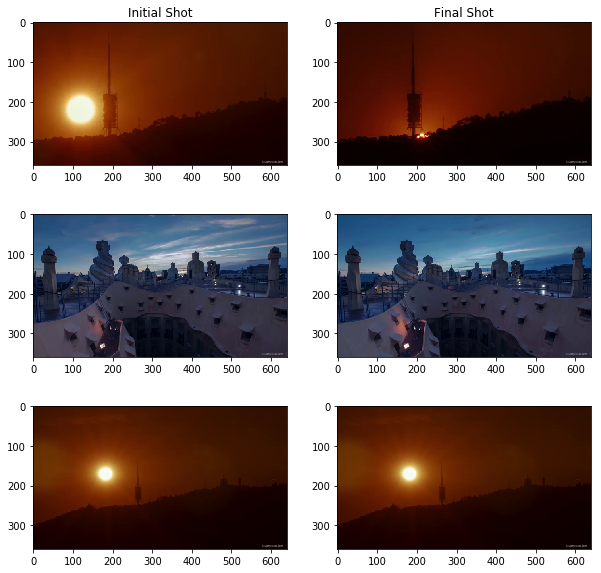

In [12]:
#WAIT TO FINISH EXECUTE OF ALL VIDEO BEFORE EXECUTE THIS CELL!!!!!

def create_shots():#create index and image list of every different shot
    index_shots = []
    image_shots = []
    for i in range(len(start)):
        if(i != len(start)-1):
            index_shots.append((start[i],final[i]))
            image_shots.append((ic[start[i]-1],ic[final[i]-1]))
            
        else:
            index_shots.append((start[i],start[i]+1))
            image_shots.append((ic[start[i]-1],ic[start[i]]))
    return index_shots,image_shots

def visualize_shots(images):#Visualizes where every shot starts and finishes
    %matplotlib inline
    figure, ax = plt.subplots(nrows=len(images),ncols=2,figsize=(10,10))
    ax[0][0].title.set_text("Initial Shot")
    ax[0][1].title.set_text("Final Shot")
    for i in range(len(images)):
        ax[i][0].imshow(images[i][0])
        ax[i][1].imshow(images[i][1])
    plt.show()
index,images = create_shots()
visualize_shots(images)
#the last photo contains again the first image so it detects 3 shots